In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

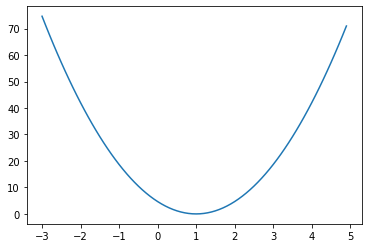

In [3]:
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

## Linear Model의 식
hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))

sess = tf.Session()

sess.run(tf.global_variables_initializer())

W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

plt.plot(W_val, cost_val)
plt.show()

In [6]:
## Gradient Descent
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X * W

cost = tf.reduce_sum(tf.square(hypothesis - Y))

# Gradient Descent 미분식
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 48.16503 [-0.8548205]
1 13.7002735 [0.01076245]
2 3.8969657 [0.4724067]
3 1.1084704 [0.7186169]
4 0.31529817 [0.84992903]
5 0.08968477 [0.91996217]
6 0.025510274 [0.9573132]
7 0.007256249 [0.9772337]
8 0.0020639997 [0.987858]
9 0.00058709644 [0.99352425]
10 0.00016699565 [0.99654627]
11 4.7498892e-05 [0.99815804]
12 1.3512343e-05 [0.9990176]
13 3.8425865e-06 [0.9994761]
14 1.093109e-06 [0.9997206]
15 3.1086245e-07 [0.999851]
16 8.8407305e-08 [0.99992055]
17 2.5128447e-08 [0.9999576]
18 7.1363395e-09 [0.9999774]
19 2.038135e-09 [0.99998796]
20 5.8014393e-10 [0.99999356]


In [7]:
## Minimize: Gradient Descent => 미분안하고 텐서플로 내부로 구현하기
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost) 

In [11]:
## Gradient Descent 위에꺼 사용해서
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(-3.0)

hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))

## Minimize: Gradient Descent => 미분안하고 텐서플로 내부로 구현하기
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost) 

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run(W))
    sess.run(train)

0 -3.0
1 0.7333336
2 0.98222226
3 0.9988148
4 0.99992096
5 0.9999947
6 0.99999964
7 0.99999994
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0


In [15]:
## Gradient Descent 위에꺼 사용해서
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(5.)

hypothesis = X * W

# Gradient 식 리뉴얼
gradient = tf.reduce_mean((W * X - Y) * X) * 2

cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Get gradients
gvs = optimizer.compute_gradients(cost)  ## 기울기 계산 / 계산된 기울기를 조작해서 다음 식에 apply 가능
# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run([gradient, W, gvs]))
    sess.run(apply_gradients)

TypeError: Fetch argument None has invalid type <class 'NoneType'>

In [16]:
# Lab 3 Minimizing Cost
# This is optional
import tensorflow as tf

# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.)

# Linear model
hypothesis = X * W

# Manual gradient
gradient = tf.reduce_mean((W * X - Y) * X) * 2

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Get gradients
gvs = optimizer.compute_gradients(cost)

# Optional: modify gradient if necessary
# gvs = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gvs]

# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    for step in range(101):
        gradient_val, gvs_val, _ = sess.run([gradient, gvs, apply_gradients])
        print(step, gradient_val, gvs_val)

TypeError: Fetch argument None has invalid type <class 'NoneType'>